In [3]:
pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=f1c88e90039ca38275c62c3f0531a185c3a219c1c9bbaea3d81e0fc4b5d676c8
  Stored in directory: c:\users\bramee\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0


In [30]:
#importing required libraries

import os
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from numpy import asarray
from numpy import save

import tensorflow as tf

from keras.preprocessing.image import  load_img
from keras.preprocessing.image import img_to_array

from keras.utils import np_utils

from tensorflow.random import set_seed
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.random import set_seed
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [12]:
# Loading images and checking sample images
images = os.listdir(r'C:\Users\bramee\OneDrive\Desktop\trainn')
print("Sample images",images[::120])

Sample images ['jean_1.jpg', 'jean_207.jpg', 'jean_38.jpg', 'saree_146.jpg', 'saree_254.jpg', 'saree_85.jpg', 'trouser_193.jpg', 'trouser_300.jpg']


In [13]:
print("Total number of images =",len(images))

Total number of images = 924


In [14]:
# Let's see the samples images

def sample_images(path,item):
  nrows = 4
  ncols = 4

  fig = plt.gcf()
  fig.set_size_inches(nrows*4, ncols*4)

  nxt_image = [os.path.join(path,figr)
  for figr in item]

  # Generating plot
  for i ,img_path in enumerate(nxt_image):
    plt.subplot(nrows, ncols, i+1)
  
    img = mpimg.imread(img_path)
    plt.axis('off')
    plt.imshow(img)

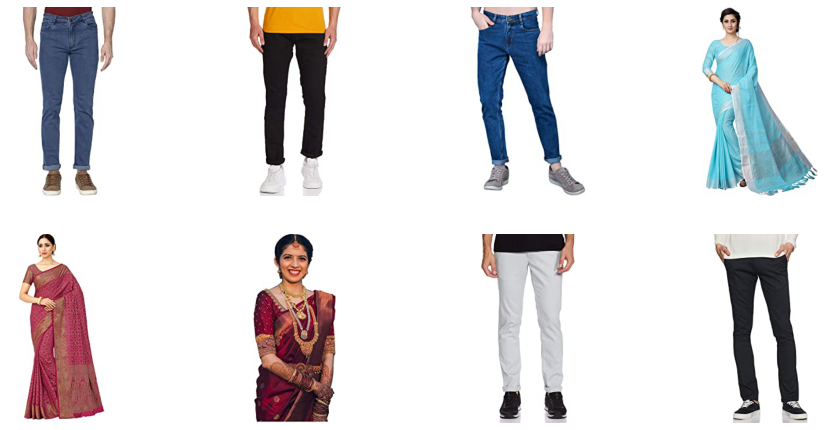

In [15]:
sample_images(r'C:\Users\bramee\OneDrive\Desktop\trainn',images[::120])

In [17]:
# Let's now save to a new file

photos ,label = [],[]

def combine_all(folder):
 for file in listdir(folder):
	# determine class
    output = 0.0
    if file.startswith('j'):       # jeans
        output = 1.0
    elif file.startswith('s'):     # sarees
        output = 2.0 
    else: # file.startswith('t'):   #trousers
        output = 3.0
  	# load image

    photo = load_img(folder +'/'+ file ,target_size=(200,200))
    # convert to numpy array
    photo = img_to_array(photo)
    # storing
    photos.append(photo)
    label.append(output)

In [18]:
combine_all(r'C:\Users\bramee\OneDrive\Desktop\trainn')

In [19]:
# convert to numpy array
photos = asarray(photos)
label = asarray(label)

print(photos.shape, label.shape)

(924, 200, 200, 3) (924,)


In [20]:
# save the reshaped photos
save("amazon_photos.npy",photos)
save('amazon_labels.npy',label)

In [21]:
# defining independent and target variables
x = photos
y = label

In [22]:
print(x.shape)
print(y.shape)

(924, 200, 200, 3)
(924,)


In [23]:
y.astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
y = np_utils.to_categorical(y-1, 3)
y.shape

(924, 3)

In [25]:
# Rescaling the image
x = x/255
x

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.5058824 , 0.4       , 0.33333334],
         [0.7490196 , 0.6784314 , 0.6392157 ],
         [1.        , 0.99215686, 0.972549  ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.52156866, 0.41568628, 0.34901962],
         [0.72156864, 0.6509804 , 0.6117647 ],
         [1.        , 0.99215686, 0.972549  ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.5254902 , 0.41960785, 0.3529412 ],
         [0.654902  , 0.58431375, 0.54509807],
         [1.        , 0.99215686, 0.972549  ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [41]:
# splitting dataset

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(693, 200, 200, 3) (693, 3)
(231, 200, 200, 3) (231, 3)


# Image Data Generator

In [42]:
from keras.preprocessing.image import ImageDataGenerator

# Image data augmentation
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

# Model Building

In [43]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 3 output neurons for 3 classes with the softmax activation
    tf.keras.layers.Dense(3, activation='softmax')
])

# Model Summary

In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 23, 23, 64)      

In [45]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
# Fit the model
history = model.fit(x_train,y_train, epochs=10, validation_split=0.2, # taking 20 percent of training set for validation
                  callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=3))

Epoch 1/10
18/18 [==============================] - 11s 638ms/step - loss: 0.2899 - accuracy: 0.8736 - val_loss: 0.4257 - val_accuracy: 0.8129
Epoch 2/10
18/18 [==============================] - 12s 641ms/step - loss: 0.2403 - accuracy: 0.8899 - val_loss: 0.4022 - val_accuracy: 0.8273
Epoch 3/10
18/18 [==============================] - 11s 637ms/step - loss: 0.2083 - accuracy: 0.9116 - val_loss: 0.4964 - val_accuracy: 0.8058
Epoch 4/10
18/18 [==============================] - 12s 645ms/step - loss: 0.1939 - accuracy: 0.8989 - val_loss: 0.4045 - val_accuracy: 0.8129
Epoch 5/10
18/18 [==============================] - 11s 631ms/step - loss: 0.1910 - accuracy: 0.9224 - val_loss: 0.4461 - val_accuracy: 0.7914


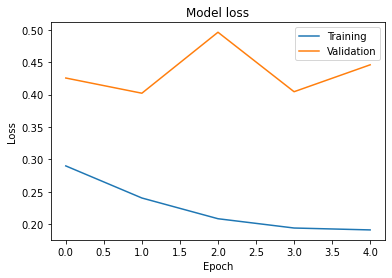

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [50]:
print("Accuracy : ", model.evaluate(x_test, y_test))

8/8 [==============================] - 1s 125ms/step - loss: 0.3668 - accuracy: 0.8571
Accuracy :  [0.36684566736221313, 0.8571428656578064]


In [51]:
# Prediction on the test image
cnn_pred = model.predict(x_test, verbose=1)
cnn_pred = np.argmax(cnn_pred, axis=1) # this will pick the value in an array having the maximum score

8/8 [==============================] - 1s 93ms/step


In [53]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[2]

0

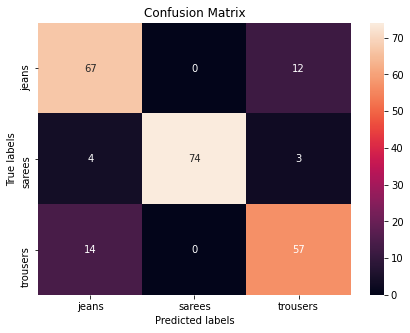

In [55]:
import seaborn as sns

# Confusion matrix for results
cm = confusion_matrix(rounded_labels, cnn_pred)

fig, ax= plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); # annot=True to annotate cells. 'fmt' prevents the numbers from going to scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['jeans','sarees','trousers']); ax.yaxis.set_ticklabels(['jeans','sarees','trousers']);

In [56]:
test_labels=rounded_labels.tolist() # converting the test_labels into a list 

# Creating a function which picks random images and identifies the class to which the image belongs
def get_image_and_class(size):
  idx = np.random.randint(len(x_test), size=size) # generating a random image from the test data
  for i in range(len(idx)):
    plt.imshow(x_test[idx,:][i]) 
    plt.show()
    
  # Print the class of the random image picked above
    if test_labels[idx[i]] == 1:
      print('This is a sarees!')
    elif test_labels[idx[i]] == 0:
      print('This is a jeans!')
    elif test_labels[idx[i]] == 2:
      print('This is a trousers!')

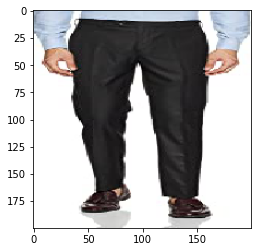

This is a trousers!


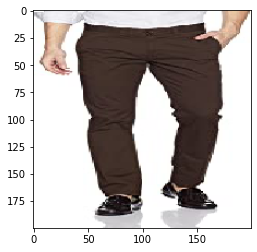

This is a trousers!


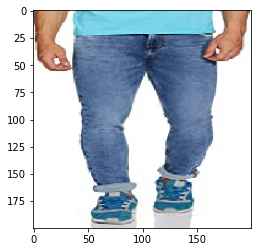

This is a jeans!


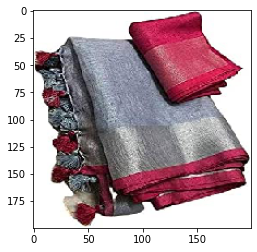

This is a sarees!


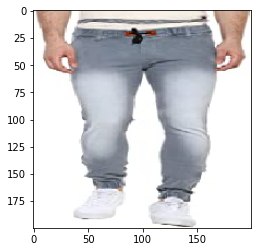

This is a jeans!


In [57]:
get_image_and_class(5)